## 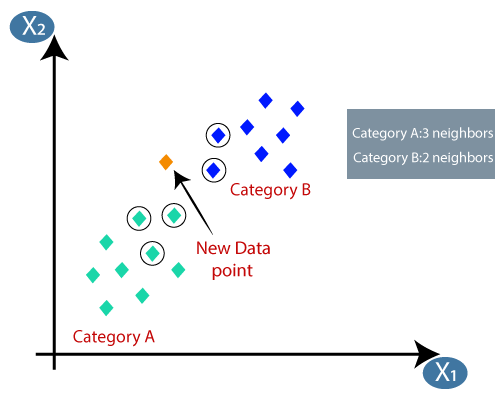

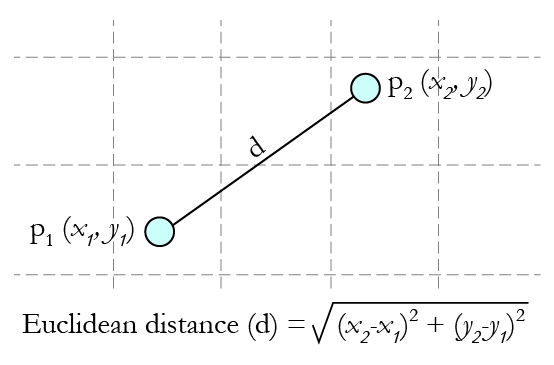

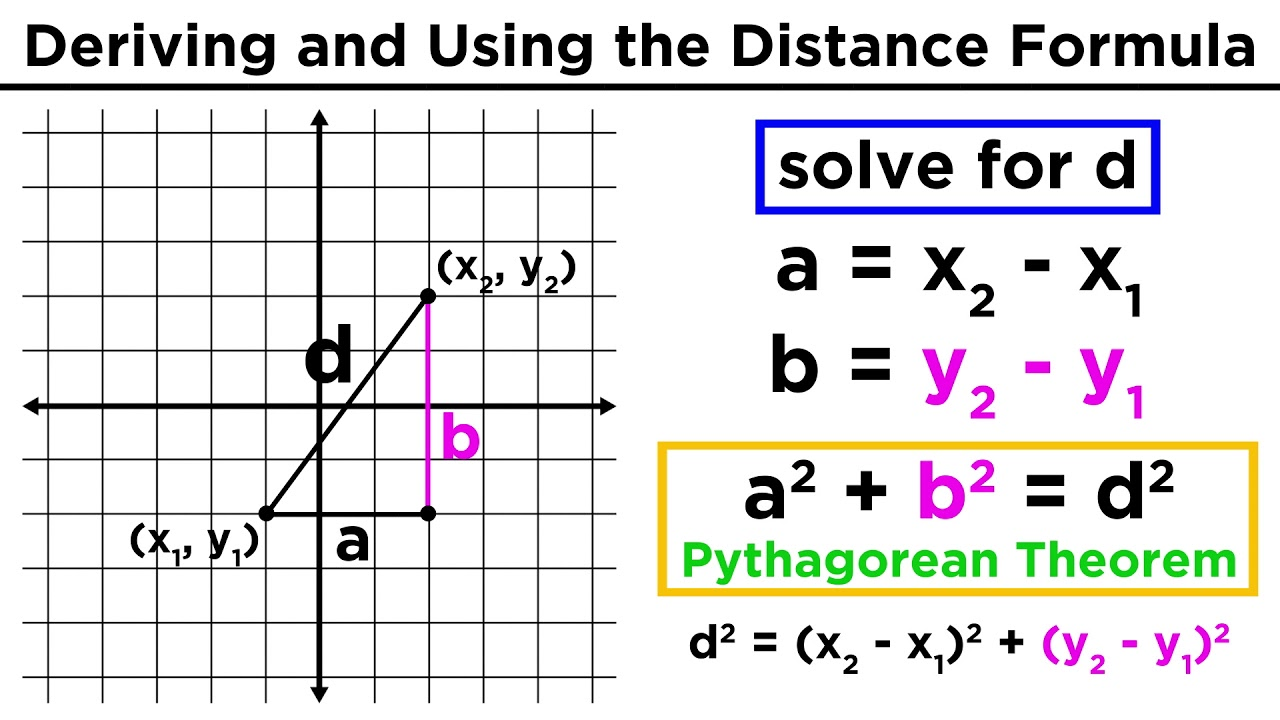

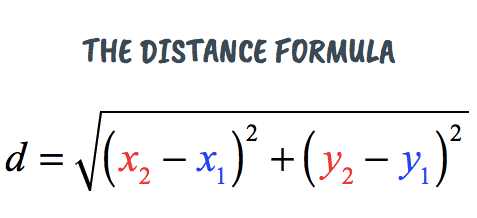

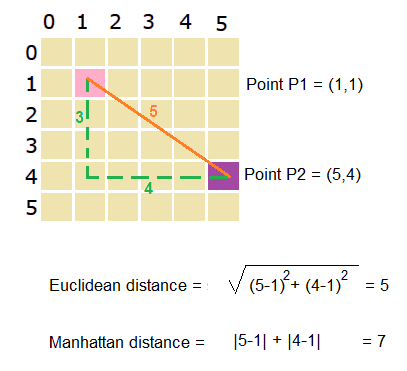

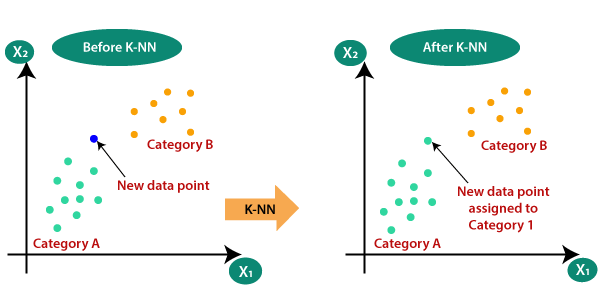

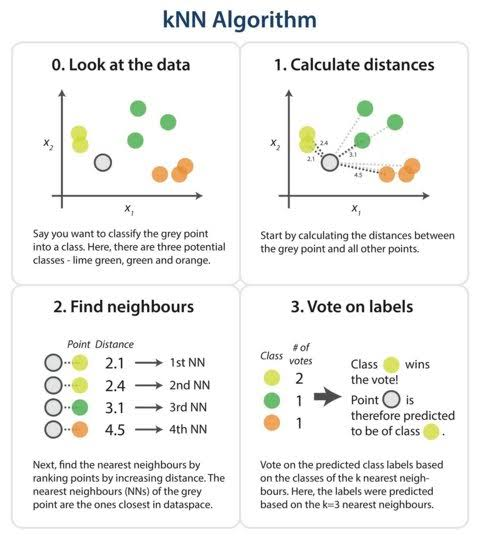

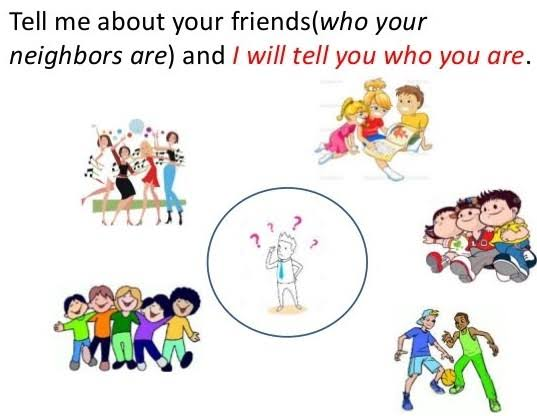

# CLASSIFICATION REPORT :-

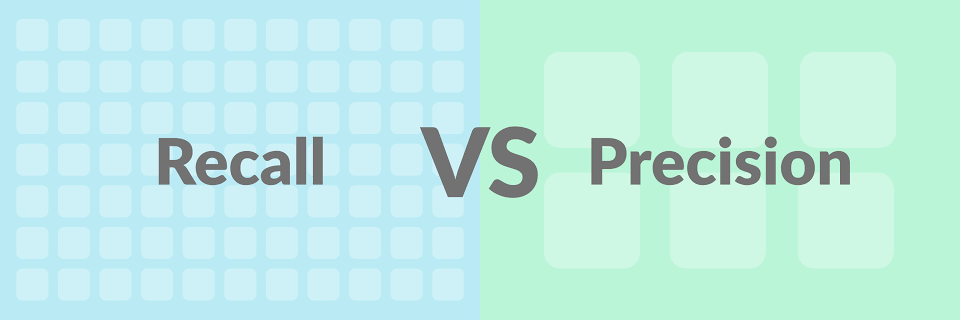

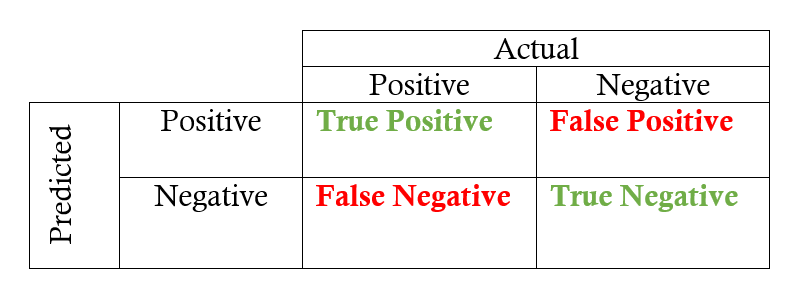

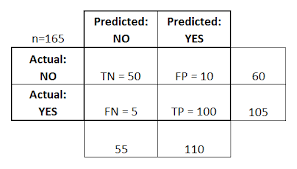

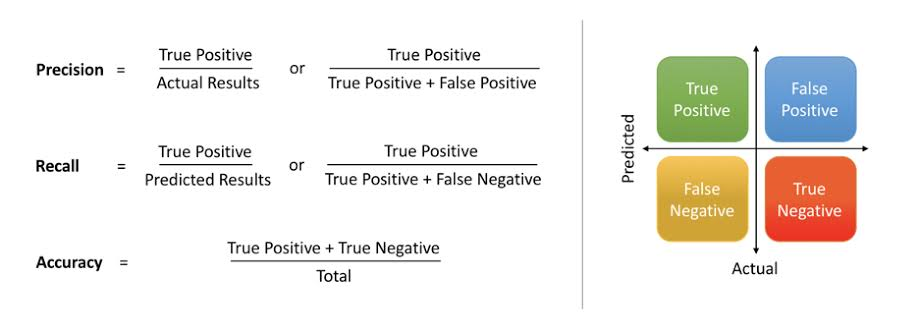

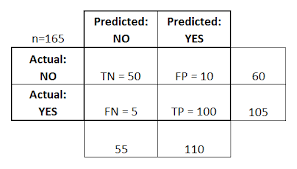

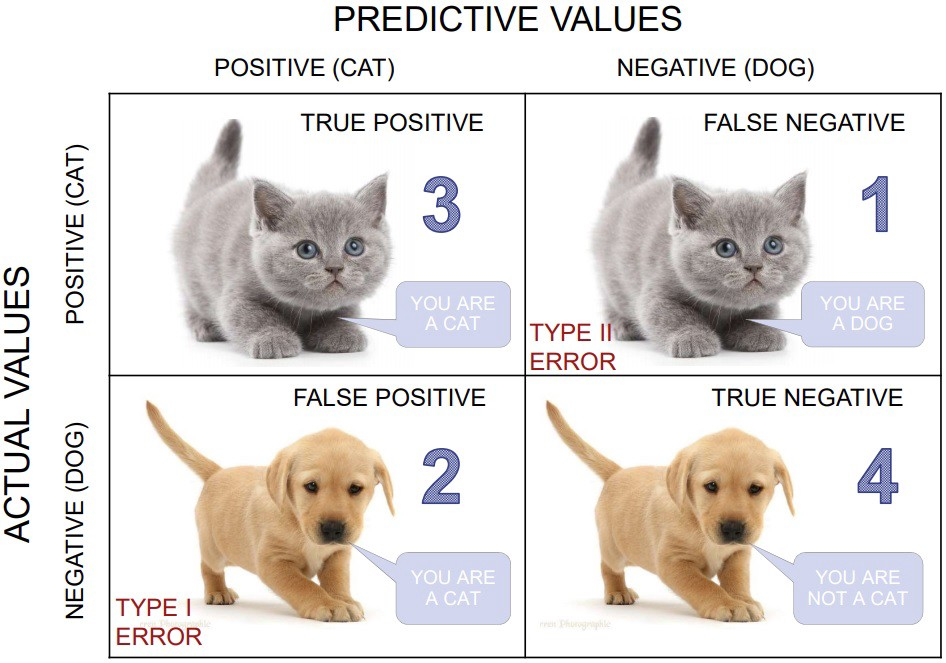

In [1]:
import pandas as pd

df = pd.read_csv("Classified Data",index_col=0)
df.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.643798  0.879422  1.231409             1  
1  1.013546  0.621552  1.492702             0  
2  1.154483  0.957877  1.285597             0  
3  1.380003  1.522692  1.153093             1  
4  0.646691  1.463812  1.419167             1

C:\Users\ABHI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ABHI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


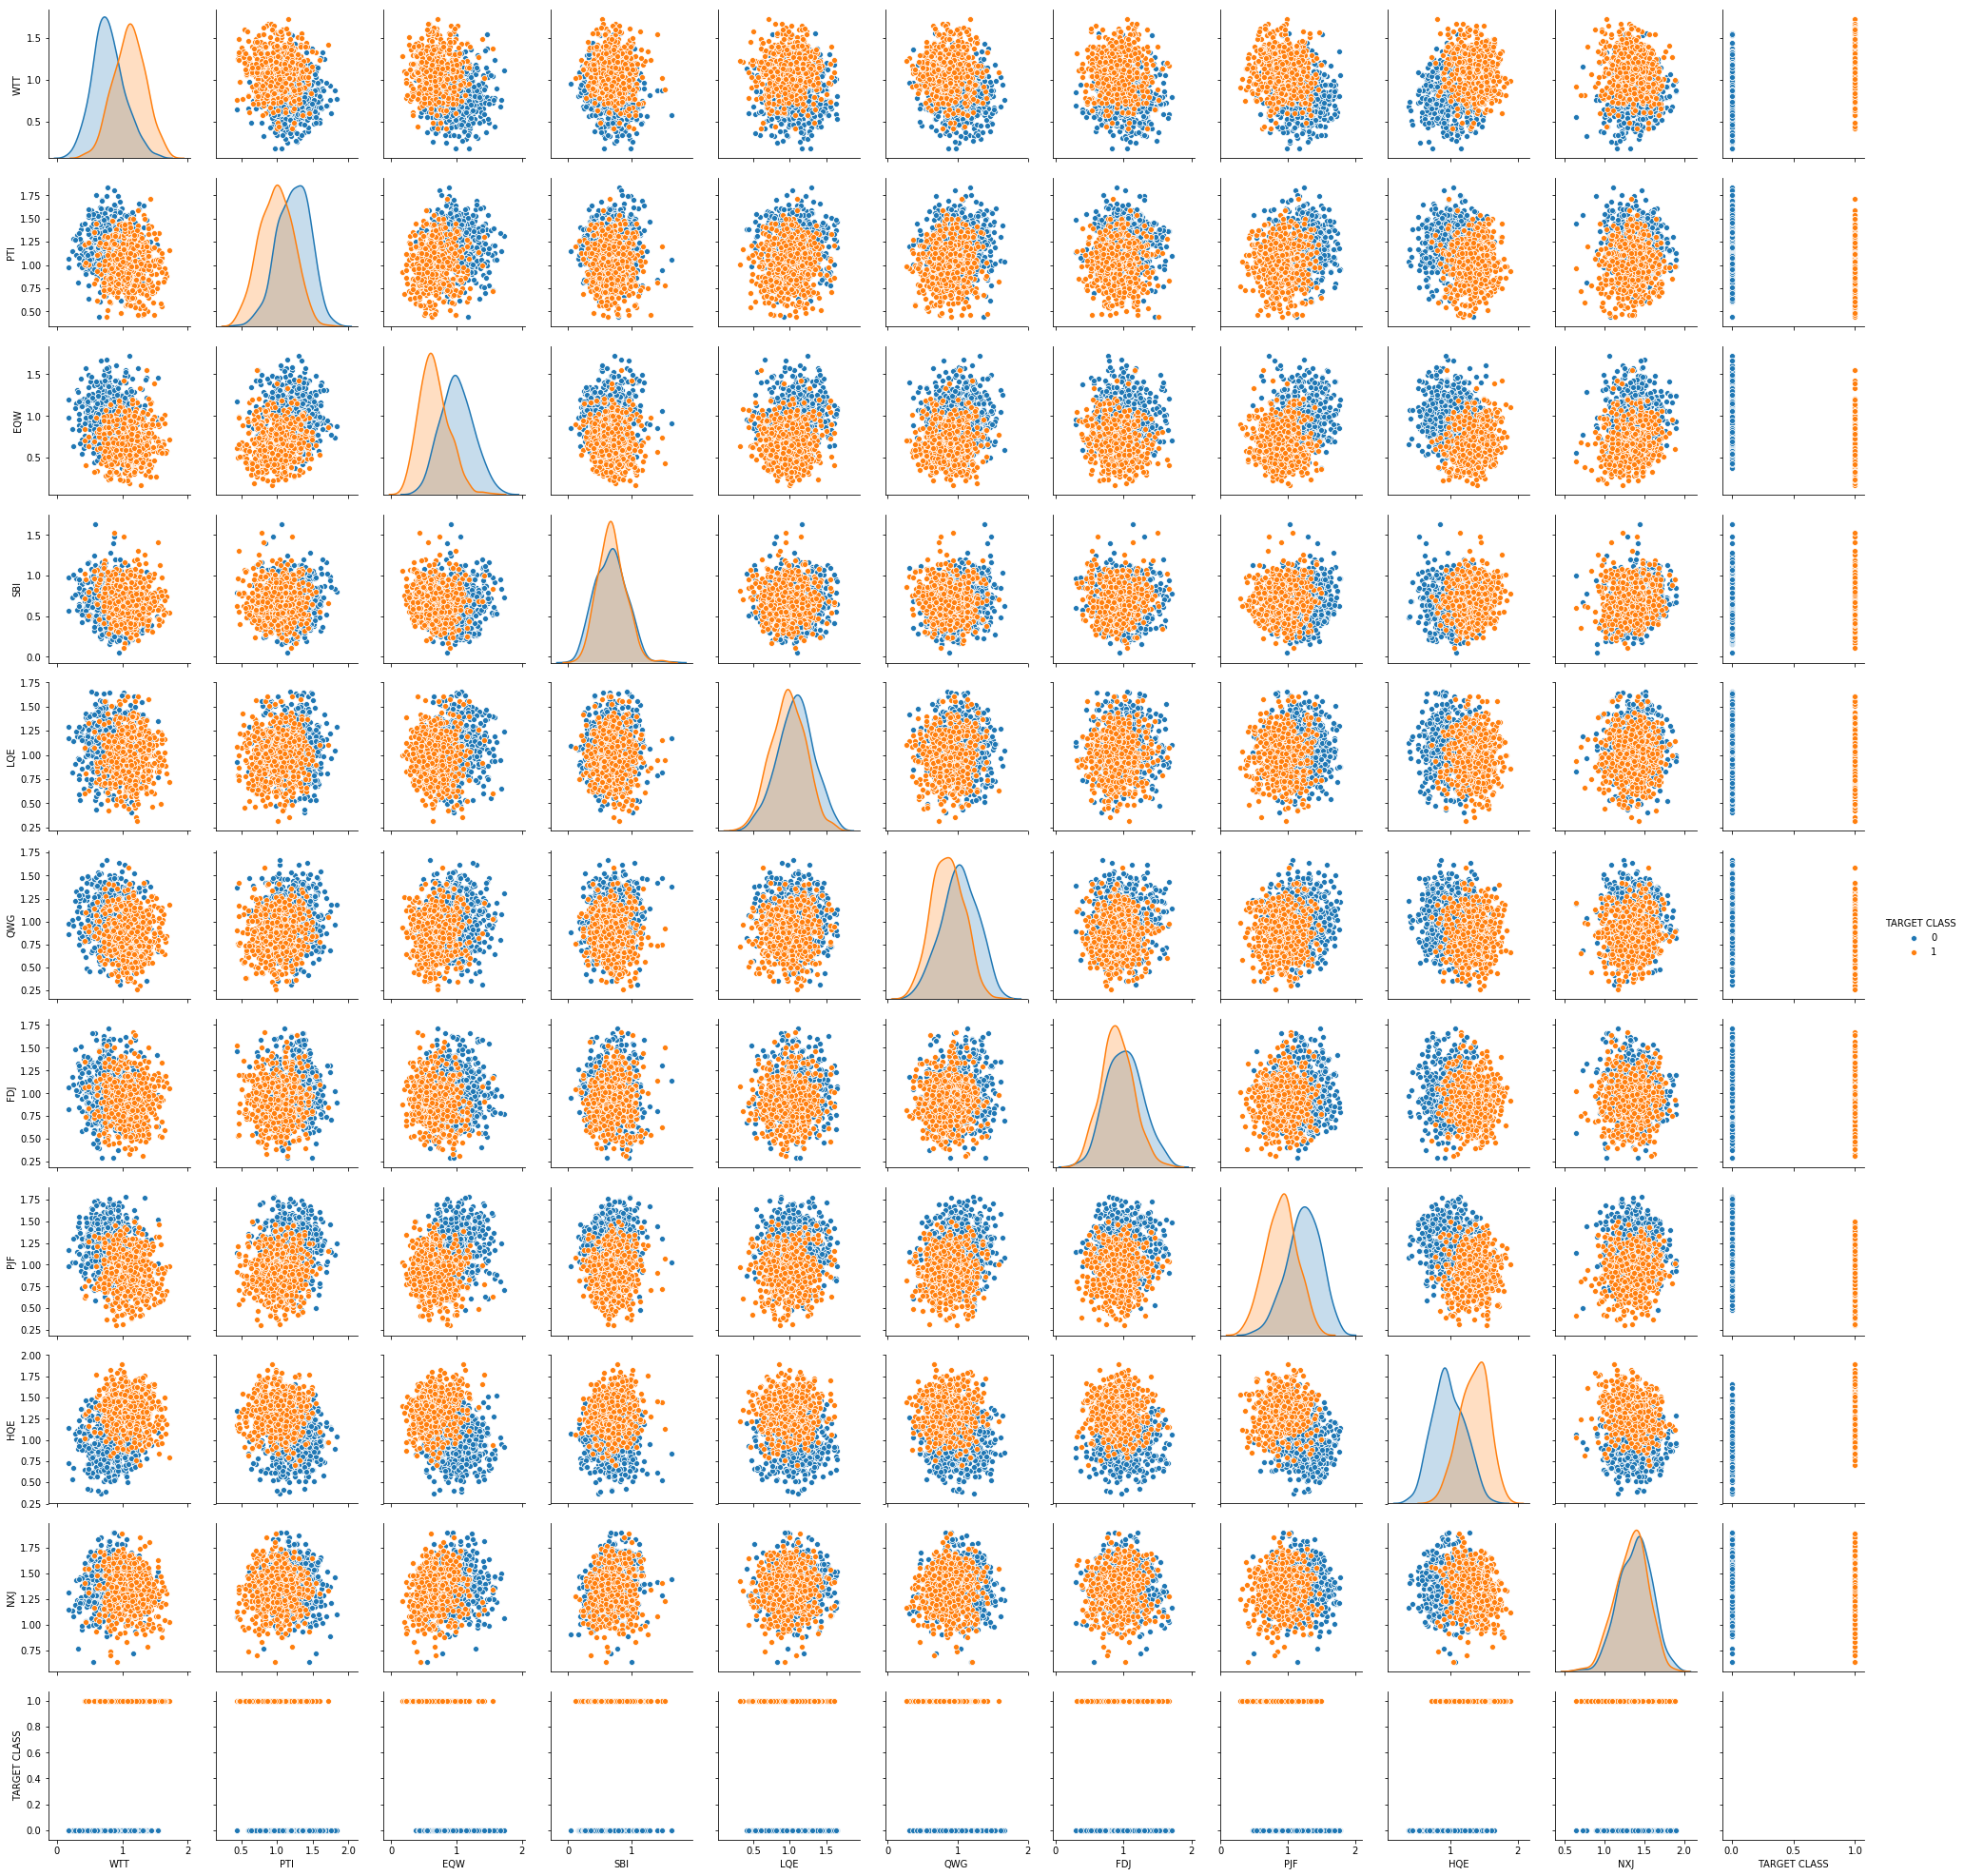

In [37]:
import seaborn as sn
sn.pairplot(df,hue ="TARGET CLASS")

In [3]:
df.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.643798  0.879422  1.231409             1  
1  1.013546  0.621552  1.492702             0  
2  1.154483  0.957877  1.285597             0  
3  1.380003  1.522692  1.153093             1  
4  0.646691  1.463812  1.419167             1

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.drop("TARGET CLASS",axis =1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
scaled = scaler.transform(df.drop("TARGET CLASS",axis =1))
scaled

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [6]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test  = train_test_split(scaled,df["TARGET CLASS"],test_size = 0.25,random_state =0)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [8]:
yp = knn.predict(x_test)
yp

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [9]:
y_test

993    1
859    0
298    0
553    1
672    1
971    0
27     1
231    0
306    1
706    1
496    0
558    1
784    0
239    1
578    1
55     0
906    1
175    1
14     0
77     1
31     1
481    1
310    1
311    0
883    1
788    1
45     0
103    0
760    0
1      0
      ..
805    0
592    0
964    0
266    0
406    1
294    1
604    0
522    0
18     0
425    1
527    0
308    1
622    1
794    1
62     0
79     1
680    1
193    1
750    1
181    0
535    1
484    0
200    1
364    1
991    1
462    0
356    0
2      0
478    1
695    1
Name: TARGET CLASS, Length: 250, dtype: int64

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,yp)
cm

array([[100,  13],
       [ 14, 123]], dtype=int64)

In [11]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       113
           1       0.90      0.90      0.90       137

   micro avg       0.89      0.89      0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250



In [12]:
#chosing a K value

# let try to make elbow method to provide K value

import numpy as np
import matplotlib.pyplot as plt
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    yp_i = knn.predict(x_test)
    error_rate.append(np.mean(yp_i!=y_test))

In [35]:
yp_i

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [36]:
y_test

993    1
859    0
298    0
553    1
672    1
971    0
27     1
231    0
306    1
706    1
496    0
558    1
784    0
239    1
578    1
55     0
906    1
175    1
14     0
77     1
31     1
481    1
310    1
311    0
883    1
788    1
45     0
103    0
760    0
1      0
      ..
805    0
592    0
964    0
266    0
406    1
294    1
604    0
522    0
18     0
425    1
527    0
308    1
622    1
794    1
62     0
79     1
680    1
193    1
750    1
181    0
535    1
484    0
200    1
364    1
991    1
462    0
356    0
2      0
478    1
695    1
Name: TARGET CLASS, Length: 250, dtype: int64

In [13]:
error_rate

[0.108,
 0.12,
 0.088,
 0.088,
 0.064,
 0.068,
 0.06,
 0.08,
 0.068,
 0.068,
 0.072,
 0.068,
 0.072,
 0.072,
 0.072,
 0.072,
 0.076,
 0.072,
 0.072,
 0.08,
 0.072,
 0.072,
 0.072,
 0.072,
 0.076,
 0.076,
 0.076,
 0.08,
 0.076,
 0.08,
 0.08,
 0.076,
 0.08,
 0.08,
 0.08,
 0.068,
 0.08,
 0.084,
 0.08,
 0.08,
 0.076,
 0.076,
 0.072,
 0.076,
 0.076,
 0.072,
 0.076,
 0.072,
 0.076]

Text(0.5,1,'ERROR_RATE VS K_VALUE')

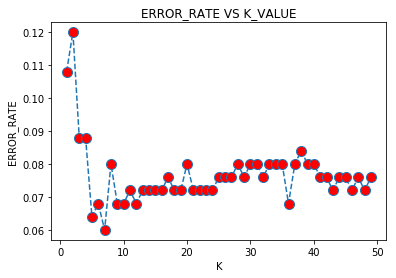

In [14]:
plt.plot(range(1,50),error_rate,linestyle = "dashed",marker = "o",markersize = 10,markerfacecolor = "red")
plt.xlabel("K")
plt.ylabel("ERROR_RATE")
plt.title("ERROR_RATE VS K_VALUE")

In [15]:
knn1 = KNeighborsClassifier(n_neighbors=23)
knn1.fit(x_train,y_train)
print(confusion_matrix(y_test,yp))

[[100  13]
 [ 14 123]]


In [16]:
knn1.score(x_test,y_test)

0.928

In [17]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       113
           1       0.90      0.90      0.90       137

   micro avg       0.89      0.89      0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250



In [28]:
df1 = pd.read_csv("iris.csv")
df1.head()

sepal_length  sepal_width  petal_length  petal_width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

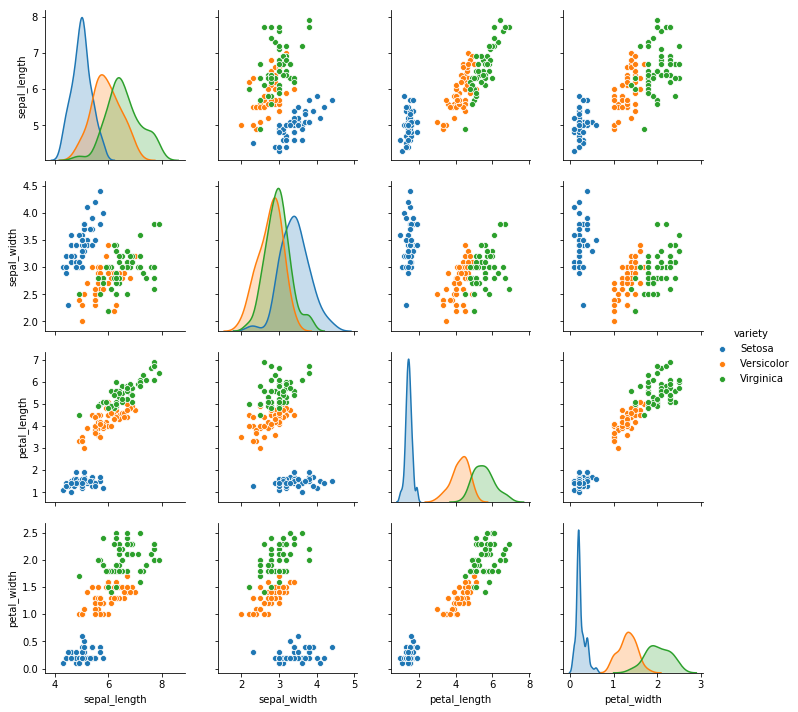

In [33]:
import seaborn as sn
sn.pairplot(df1,hue = "variety")


In [19]:
x = df1.drop("variety",axis =1)
y = df1.variety

In [20]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [21]:
kn = KNeighborsClassifier()
kn.fit(x_train1,y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
y_pred = kn.predict(x_test1)

In [23]:
y_pred

array(['Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Versicolor', 'Virginica',
       'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa',
       'Virginica', 'Versicolor', 'Setosa', 'Setosa', 'Virginica',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Setosa'],
      dtype=object)

In [24]:
kn.score(x_train1,y_train1)

0.95

In [25]:
kn.score(x_test1,y_test1)

0.9666666666666667

In [26]:
print(confusion_matrix(y_test1,y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [27]:
print(classification_report(y_test1,y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      0.92      0.96        13
   Virginica       0.86      1.00      0.92         6

   micro avg       0.97      0.97      0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

